In [1]:
import pandas as pd

In [2]:
cleaned_data = pd.read_csv("D:/4th_SEMESTER/5._DMT/J-Comp/cleaned_data_50000.csv")

In [3]:
cleaned_data.head(5)

,reviewerID,asin,reviewText,clean_reviewText,summary,clean_summary,rating,helpful_rev,not_helpful_rev,helpful_rev_ratio,rev_year,rev_month,reviewTime,rating_class
0,A3IBOQ8R44YG9L,B00000JHWX,I can't find a compelling reason to recommend ...,find compel reason recommend higher price mode...,HIGHEST value-to-price ratio. Not a flaw.,highest value-to-price ratio not flaw .,5.0,11,0,1.000000,2000,5,2000-05-03,good
1,A18JGALK8B1K6N,B0001LS3EI,Plastic hinge parts. A hinge arm with the hing...,plastic hinge part hinge arm hinge pin tip bre...,Fragile hinge,fragile hinge,2.0,0,0,0.000000,2012,1,2012-01-17,bad
2,ADUHDNN5MS4KR,B00004Y7TC,I bought a Platinum after not having a Palm de...,buy platinum not palm device years want see mi...,Very nice product...,nice product,4.0,18,1,0.947368,2000,12,2000-12-25,good
3,A1HOV5ICDDKI03,B00001W0EQ,"Bottom line, Plantronics makes the best headse...",bottom line plantronics make best headsets hap...,Great Product!,great product,5.0,5,0,1.000000,2007,3,2007-03-24,good
4,ALICSOW9JNXCD,B000065BP9,"I read the reviews, and heard the name, but ne...",read review hear name never know things sa-wee...,"Best Headphones I've Ever owned, and you can't...",best headphones ever own beat price stick,5.0,0,0,0.000000,2010,5,2010-05-29,good


In [4]:
cleaned_electronics_data = cleaned_data.drop(["asin","summary","rating","helpful_rev","not_helpful_rev","helpful_rev_ratio","rev_year","rev_month","reviewTime"], axis = 1)

In [5]:
cleaned_electronics_data.head(5)

,reviewerID,reviewText,clean_reviewText,clean_summary,rating_class
0,A3IBOQ8R44YG9L,I can't find a compelling reason to recommend ...,find compel reason recommend higher price mode...,highest value-to-price ratio not flaw .,good
1,A18JGALK8B1K6N,Plastic hinge parts. A hinge arm with the hing...,plastic hinge part hinge arm hinge pin tip bre...,fragile hinge,bad
2,ADUHDNN5MS4KR,I bought a Platinum after not having a Palm de...,buy platinum not palm device years want see mi...,nice product,good
3,A1HOV5ICDDKI03,"Bottom line, Plantronics makes the best headse...",bottom line plantronics make best headsets hap...,great product,good
4,ALICSOW9JNXCD,"I read the reviews, and heard the name, but ne...",read review hear name never know things sa-wee...,best headphones ever own beat price stick,good


In [6]:
from wordcloud import WordCloud
df = cleaned_electronics_data.groupby("rating_class")

In [7]:
good_rev = df.get_group("good")["clean_reviewText"]

bad_rev = df.get_group("bad")["clean_reviewText"]

In [8]:
good_rev.describe()

count          24988
unique         24968
top       work great
freq               4
Name: clean_reviewText, dtype: object

In [9]:
bad_rev.describe()

count                                                 19302
unique                                                19292
top       accord ritek site work get full pioneer dvr dv...
freq                                                      2
Name: clean_reviewText, dtype: object

In [10]:
good_rev_s = df.get_group("good")["clean_reviewText"].to_string()

bad_rev_s = df.get_group("bad")["clean_reviewText"].to_string()

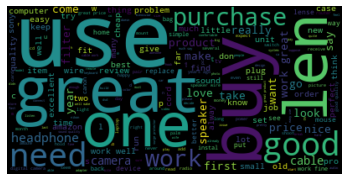

In [11]:
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(good_rev_s)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

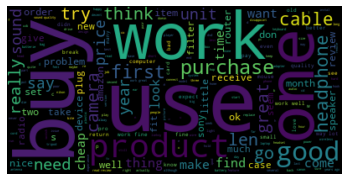

In [12]:
wordcloud = WordCloud().generate(bad_rev_s)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
from nltk.util import ngrams
import collections

In [14]:
good_rev_text = good_rev_s.split()
g_trigrams = ngrams(good_rev_text, 2)
g_trigram_frq = collections.Counter(g_trigrams)
g_trigram_frq.most_common(5)

[(('work', 'great'), 607),
 (('work', 'well'), 368),
 (('work', 'fine'), 214),
 (('years', 'ago'), 194),
 (('good', 'quality'), 190)]

In [15]:
bad_rev_text = bad_rev_s.split()
b_trigrams = ngrams(bad_rev_text, 2)
b_trigram_frq = collections.Counter(b_trigrams)
b_trigram_frq.most_common(5)

[(('work', 'well'), 234),
 (('work', 'fine'), 230),
 (('not', 'work'), 225),
 (('sound', 'quality'), 189),
 (('work', 'great'), 160)]

In [16]:
cleaned_electronics_data["clean_reviewText"] = cleaned_electronics_data["clean_reviewText"].astype("str")

In [17]:
cleaned_electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44308 entries, 0 to 44307
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reviewerID        44308 non-null  object
 1   reviewText        44291 non-null  object
 2   clean_reviewText  44308 non-null  object
 3   clean_summary     44199 non-null  object
 4   rating_class      44308 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


### Word Frequency:

In [18]:
feq = pd.Series(" ".join(cleaned_electronics_data["clean_reviewText"]).split())

In [19]:
feq.value_counts()[0:20]

not        38711
.          35690
use        34612
get        25793
work       24523
one        20653
buy        18762
good       16910
sound      14904
like       14884
lens       14773
would      14505
great      14465
no         13762
make       12828
camera     12496
go         12124
time       11575
quality    11355
need       11068
dtype: int64

In [20]:
good_rev = good_rev.astype("str")
feq_good_rev = pd.Series(" ".join(good_rev).split()).value_counts()
#least_feq_good_rev = pd.Series(" ".join(good_rev).split()).value_counts()[::-1][:20]
#least_feq_good_rev
feq_good_rev[0:12]

use      19984
.        19522
not      16399
get      12605
work     11451
one      10887
great    10756
lens     10360
good      9920
buy       9409
sound     8483
like      8236
dtype: int64

In [21]:
bad_rev = bad_rev.astype("str")
feq_bad_rev = pd.Series(" ".join(bad_rev).split()).value_counts()
#least_feq_bad_rev = pd.Series(" ".join(bad_rev).split()).value_counts()[::-1][:20]
#least_feq_bad_rev
feq_bad_rev[0:12]

not      22312
.        16168
use      14628
get      13188
work     13072
one       9766
buy       9353
would     7979
no        7044
good      6990
like      6648
sound     6421
dtype: int64

In [22]:
#find common words in good rev and bad rev and their fequency
good_words = list(" ".join(good_rev).split())
bad_words = list(" ".join(bad_rev).split())
common_words = list(set(good_words)&set(bad_words))
type(common_words)
freq_good_common = list(feq_good_rev[common_words])
freq_bad_common = list(feq_bad_rev[common_words])

In [23]:
data = {"common_words": common_words, "good_rev" : freq_good_common, "bad_rev" : freq_bad_common}
df = pd.DataFrame(data)
df.sort_values(by=["good_rev", "bad_rev" ], inplace=True, ascending=False)
df.head(20)
df2 = df[(df.good_rev > 8000) & (df.bad_rev > 8000)]
most_freq_common_words = list(df2["common_words"])

In [24]:
df.head(20)

,common_words,good_rev,bad_rev
12295,use,19984,14628
56,.,19522,16168
18560,not,16399,22312
7635,get,12605,13188
8934,work,11451,13072
5762,one,10887,9766
15610,great,10756,3709
13992,lens,10360,4413
849,good,9920,6990
2525,buy,9409,9353


In [25]:
most_freq_common_words.remove("not")

In [26]:
most_freq_common_words

['use', '.', 'get', 'work', 'one', 'buy']

In [27]:
df3 = df[(df.good_rev == 1) & (df.bad_rev == 1)]
least_freq_common_words = list(df3["common_words"])

In [28]:
len(least_freq_common_words)

3289

In [29]:
remove_words  = most_freq_common_words + least_freq_common_words

In [30]:
cleaned_electronics_data["clean_reviewText"] = cleaned_electronics_data["clean_reviewText"].apply(lambda x: " ".join(x for x in x.split() if x not in remove_words))

### Spelling Correction:

In [31]:
from textblob import TextBlob

In [34]:
cleaned_electronics_data.to_csv("D:/4th_SEMESTER/5._DMT/J-Comp/cleaned_data2.csv", sep=',', encoding='utf-8', index = False)